In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random
from statsmodels.distributions.empirical_distribution import ECDF

 0.05% - 0.25333333333333335
 0.01% - 0.44
Значение критерия Колмагорова: 1.4107453652345298e-41


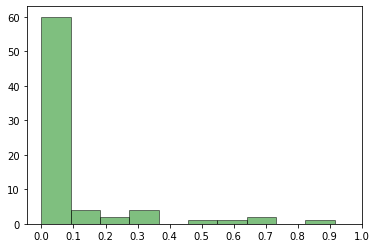

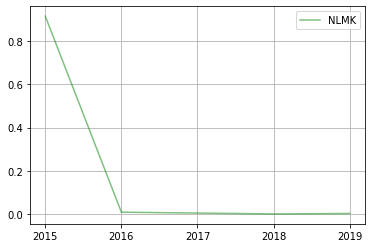

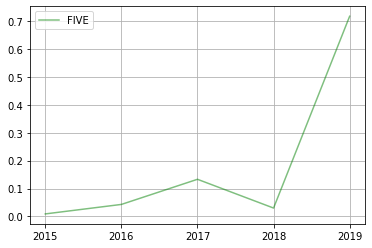

,2015,2016,2017,2018,2019,Среднее по компаниям
ALRS,0.044044,0.054054,0.002002,0.000000,0.146146,0.049249
GAZP,0.221221,0.000000,0.000000,0.000000,0.000000,0.044244
CHMF,0.295295,0.095095,0.184184,0.000000,0.006006,0.116116
ADR.FIVE,0.009009,0.043043,0.133133,0.030030,0.717718,0.186587
GMKN,0.023023,0.009009,0.067067,0.000000,0.017017,0.023223
LKOH,0.002002,0.026026,0.004004,0.000000,0.022022,0.010811
MGNT,0.000000,0.000000,0.000000,0.000000,0.047047,0.009409
MTSS,0.000000,0.023023,0.000000,0.000000,0.000000,0.004605
NLMK,0.915916,0.008008,0.004004,0.000000,0.002002,0.185986
NVTK,0.312312,0.030030,0.011011,0.000000,0.498498,0.170370


In [137]:
def main():
    def close_split(line):
        A = line.split(',')
        close = float(A[7])
        return close

    def close_list_year(co,year):
        close = []
        co = str(co)
        with open(f"{co}.csv") as f:
            for line in f:
                l = line.split(',')
                if int((l[2])[:4]) == year:
                    a = close_split(line)
                    close.append(a)     
        return close
    
    def close_list_alltime(co):
        return [close_list_year(f'{co}', year = i) for i in range(2015,2020)]

    def log_norm(a):
        c = []
        for i in range(0,len(a)-2):
            b = (a[i+1])/(a[i])
            r = np.log(b)
            c.append(r)
        return c
    
    def pv(a,value):
        a = log_norm(a)
        statistic = []
        R = max(a)-min(a)
        S = np.std(a)
        U = R/S
        statistic.append(U)
        ecdf = ECDF(value)
        pv = [1 - (ecdf(statistic))[i] for i in range(len(statistic))]
        
        return pv
                
    cps = [
        "ALRS",
        "GAZP",
        "CHMF",
        "ADR.FIVE",
        "GMKN",
        "LKOH",
        "MGNT",
        "MTSS",
        "NLMK",
        "NVTK",
        "ROSN",
        "SBER",
        "SNGS",
        "TATN",
        "YNDX"
    ]
    
    # Загружаем значения квантилей
    level=[]
    value=[]
    with open("Таблица_Квантилей.txt", "r") as f:
        for line in f:
            line_list = line.split(',')
            level.append(line_list[0])
            value.append(float((line_list[1])[:7]))
    
    
    #Записываем данные
    ALRS = close_list_alltime('ALRS')
    GAZP = close_list_alltime('GAZP')
    CHMF = close_list_alltime('CHMF')
    FIVE = close_list_alltime('ADR.FIVE')
    GMKN = close_list_alltime('GMKN')
    LKOH = close_list_alltime('LKOH')
    MGNT = close_list_alltime('MGNT')
    MTSS = close_list_alltime('MTSS')
    NLMK = close_list_alltime('NLMK')
    NVTK = close_list_alltime('NVTK')
    ROSN = close_list_alltime('ROSN')
    SBER = close_list_alltime('SBER')
    SNGS = close_list_alltime('SNGS')
    TATN = close_list_alltime('TATN')
    YNDX = close_list_alltime('YNDX')
    
    #считаем логдоходность
    ALRS = [pv(ALRS[year],value) for year in range(len(ALRS))]
    GAZP = [pv(GAZP[year],value) for year in range(len(GAZP))]
    CHMF = [pv(CHMF[year],value) for year in range(len(CHMF))]
    FIVE = [pv(FIVE[year],value) for year in range(len(FIVE))]
    GMKN = [pv(GMKN[year],value) for year in range(len(GMKN))]
    LKOH = [pv(LKOH[year],value) for year in range(len(LKOH))]
    MGNT = [pv(MGNT[year],value) for year in range(len(MGNT))]
    MTSS = [pv(MTSS[year],value) for year in range(len(MTSS))]
    NLMK = [pv(NLMK[year],value) for year in range(len(NLMK))]
    NVTK = [pv(NVTK[year],value) for year in range(len(NVTK))]
    ROSN = [pv(ROSN[year],value) for year in range(len(ROSN))]
    SBER = [pv(SBER[year],value) for year in range(len(SBER))]
    SNGS = [pv(SNGS[year],value) for year in range(len(SNGS))]
    TATN = [pv(TATN[year],value) for year in range(len(TATN))]
    YNDX = [pv(YNDX[year],value) for year in range(len(YNDX))]

    ALRS = [ ALRS[year][0] for year in range(len(ALRS))]
    GAZP = [ GAZP[year][0] for year in range(len(GAZP))]
    CHMF = [ CHMF[year][0] for year in range(len(CHMF))]
    FIVE = [ FIVE[year][0] for year in range(len(FIVE))]
    GMKN = [ GMKN[year][0] for year in range(len(GMKN))]
    LKOH = [ LKOH[year][0] for year in range(len(LKOH))]
    MGNT = [ MGNT[year][0] for year in range(len(MGNT))]
    MTSS = [ MTSS[year][0] for year in range(len(MTSS))]
    NLMK = [ NLMK[year][0] for year in range(len(NLMK))]
    NVTK = [ NVTK[year][0] for year in range(len(NVTK))]
    ROSN = [ ROSN[year][0] for year in range(len(ROSN))]
    SBER = [ SBER[year][0] for year in range(len(SBER))]
    SNGS = [ SNGS[year][0] for year in range(len(SNGS))]
    TATN = [ TATN[year][0] for year in range(len(TATN))]
    YNDX = [ YNDX[year][0] for year in range(len(YNDX))]
    
    companies = []
    
    companies.append(ALRS)
    companies.append(GAZP)
    companies.append(CHMF)
    companies.append(FIVE)
    companies.append(GMKN)
    companies.append(LKOH)
    companies.append(MGNT)
    companies.append(MTSS)
    companies.append(NLMK)
    companies.append(NVTK)
    companies.append(ROSN)
    companies.append(SBER)
    companies.append(SNGS)
    companies.append(TATN)
    companies.append(YNDX)
    
    df = pd.DataFrame(data=companies, index = cps, columns = range(2015,2020))
    df['Среднее по компаниям'] = df.mean(axis=1)
    df.loc['Среднее по годам'] = df.mean(axis=0)
    df.to_excel('P_значения_реальных_данных.xlsx')
    
    companies = [companies[year][i] for year in range(len(companies)) for i in range(5) ]
    
    res1= 0
    res2 = 0 
    
    for co in companies:
        if co > 0.05:
            res1 += 1
    
    for co in companies:
        if co > 0.01:
            res2 += 1
    
    print(f' 0.05% - {res1/len(companies)}')
    print(f' 0.01% - {res2/len(companies)}')
    
    ks_test = []# Тест Критерия Колмагорова
    
    for i in range(10000):
        ks_test.append(stats.kstest(companies,'uniform').pvalue)

    print(f'Значение критерия Колмагорова: {np.mean(ks_test)}')
    
    num_bins = 10
    n, bins, patches = plt.hist(companies, num_bins,edgecolor='black', facecolor='green', alpha=0.5)
    plt.xticks(np.arange(0,1.1,0.1))
    plt.show()
    
    nlmk = [df.loc['NLMK', i] for i in range(2015,2020)]
    x = range(2015,2020)
    
    fig, ax = plt.subplots()
    plt.grid()
    plt.xticks(range(2015,2020))
    ax.plot(x, nlmk, label = 'NLMK', color='green', alpha=0.5)
    ax.legend()
    plt.show()
    
    five = [df.loc['ADR.FIVE', i] for i in range(2015,2020)]
    x = range(2015,2020)
    
    fig, ax = plt.subplots()
    plt.grid()
    plt.xticks(range(2015,2020))
    ax.plot(x, five, label = 'FIVE', color='green', alpha=0.5)
    ax.legend()
    plt.show()
    
    
    return df
    
main()